# 描述性分析与探索性数据分析

**学习目标**:
1. 掌握描述性统计的核心指标（集中趋势、离散程度、分布形态）
2. 学会进行系统的探索性数据分析（EDA）
3. 掌握异常值识别与处理方法
4. 理解数据分布与业务含义的关系
5. 学会用可视化辅助数据理解

**预计时间**: 25-30分钟

## 第一部分: 导入库与数据准备

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.precision', 2)  # 设置小数精度
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子
np.random.seed(42)

print("✅ 库导入完成！")
print(f"Pandas版本: {pd.__version__}")
print(f"NumPy版本: {np.__version__}")

✅ 库导入完成！
Pandas版本: 2.3.3
NumPy版本: 1.26.4


## 第二部分: 描述性统计

### 2.1 集中趋势 (Central Tendency)

In [55]:
# 生成模拟销售数据
sales_data = np.array([120, 135, 128, 142, 150, 118, 165, 138, 145, 132, 
                       155, 122, 148, 500, 139, 141, 136, 147, 133, 144])  # 注意：500是异常值

print("原始销售数据（万元）:")
print(sales_data)
print(f"\n数据点数量: {len(sales_data)}")

原始销售数据（万元）:
[120 135 128 142 150 118 165 138 145 132 155 122 148 500 139 141 136 147
 133 144]

数据点数量: 20


In [56]:
# 计算集中趋势指标
mean_value = sales_data.mean()
median_value = np.median(sales_data)
mode_value = stats.mode(sales_data, keepdims=True)[0][0]

print("集中趋势指标:")
print(f"均值 (Mean): {mean_value:.2f} 万元")
print(f"中位数 (Median): {median_value:.2f} 万元")
print(f"众数 (Mode): {mode_value:.2f} 万元")

print("\n💡 观察: 均值明显大于中位数，说明存在极端值（500）")

集中趋势指标:
均值 (Mean): 156.90 万元
中位数 (Median): 140.00 万元
众数 (Mode): 118.00 万元

💡 观察: 均值明显大于中位数，说明存在极端值（500）


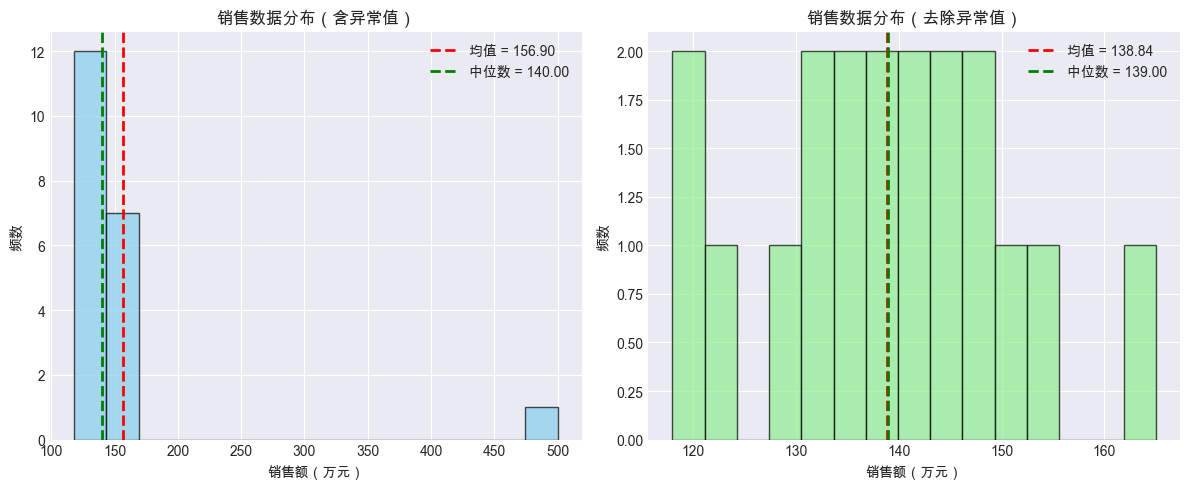

💡 结论: 中位数对异常值不敏感，是更稳健的集中趋势指标


In [57]:
# 可视化：集中趋势对比
plt.figure(figsize=(12, 5))

# 左图：含异常值
plt.subplot(1, 2, 1)
plt.hist(sales_data, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'均值 = {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'中位数 = {median_value:.2f}')
plt.title('销售数据分布（含异常值）', fontsize=12, fontweight='bold')
plt.xlabel('销售额（万元）')
plt.ylabel('频数')
plt.legend()

# 右图：去除异常值
sales_clean = sales_data[sales_data < 300]  # 去除极端值
mean_clean = sales_clean.mean()
median_clean = np.median(sales_clean)

plt.subplot(1, 2, 2)
plt.hist(sales_clean, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
plt.axvline(mean_clean, color='red', linestyle='--', linewidth=2, label=f'均值 = {mean_clean:.2f}')
plt.axvline(median_clean, color='green', linestyle='--', linewidth=2, label=f'中位数 = {median_clean:.2f}')
plt.title('销售数据分布（去除异常值）', fontsize=12, fontweight='bold')
plt.xlabel('销售额（万元）')
plt.ylabel('频数')
plt.legend()

plt.tight_layout()
plt.show()

print("💡 结论: 中位数对异常值不敏感，是更稳健的集中趋势指标")

### 2.2 离散程度 (Dispersion)

In [58]:
# 创建两组平均值相同但离散程度不同的数据
group_a = np.array([98, 99, 100, 101, 102])  # 离散程度小
group_b = np.array([50, 75, 100, 125, 150])  # 离散程度大

print("组A数据:", group_a)
print(f"均值: {group_a.mean():.2f}, 标准差: {group_a.std():.2f}")

print("\n组B数据:", group_b)
print(f"均值: {group_b.mean():.2f}, 标准差: {group_b.std():.2f}")

print("\n💡 观察: 两组数据均值相同（100），但组B的标准差远大于组A")

组A数据: [ 98  99 100 101 102]
均值: 100.00, 标准差: 1.41

组B数据: [ 50  75 100 125 150]
均值: 100.00, 标准差: 35.36

💡 观察: 两组数据均值相同（100），但组B的标准差远大于组A


In [59]:
# 计算完整的离散程度指标
data = sales_clean  # 使用去除异常值后的数据

variance = data.var()
std_dev = data.std()
range_value = data.max() - data.min()
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
cv = (std_dev / data.mean()) * 100  # 变异系数

print("离散程度指标:")
print(f"方差 (Variance): {variance:.2f}")
print(f"标准差 (Std Dev): {std_dev:.2f} 万元")
print(f"极差 (Range): {range_value:.2f} 万元")
print(f"四分位距 (IQR): {IQR:.2f} 万元")
print(f"变异系数 (CV): {cv:.2f}%")

print("\n💡 解释:")
print(f"  - 大约68%的数据在 [{data.mean()-std_dev:.2f}, {data.mean()+std_dev:.2f}] 范围内（±1σ）")
print(f"  - 变异系数{cv:.2f}%表示数据波动较{'小' if cv < 15 else '大'}")

离散程度指标:
方差 (Variance): 136.55
标准差 (Std Dev): 11.69 万元
极差 (Range): 47.00 万元
四分位距 (IQR): 13.50 万元
变异系数 (CV): 8.42%

💡 解释:
  - 大约68%的数据在 [127.16, 150.53] 范围内（±1σ）
  - 变异系数8.42%表示数据波动较小


/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_87202/2145578037.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([group_a, group_b], labels=['组A (低离散)', '组B (高离散)'])


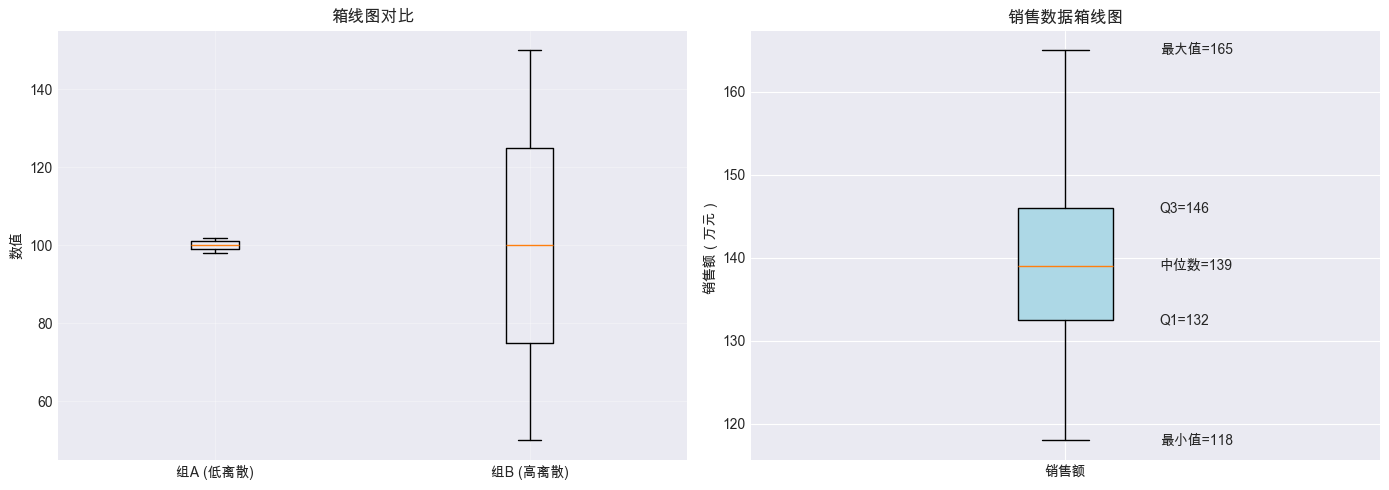

💡 箱线图的组成:
  - 箱子：包含中间50%的数据（Q1到Q3）
  - 横线：中位数
  - 须：延伸到 [Q1-1.5*IQR, Q3+1.5*IQR] 范围内的最远点
  - 圆点：异常值


In [60]:
# 可视化：箱线图展示离散程度
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 创建子图

# 左图：箱线图
axes[0].boxplot([group_a, group_b], labels=['组A (低离散)', '组B (高离散)'])
axes[0].set_title('箱线图对比', fontsize=12, fontweight='bold')
axes[0].set_ylabel('数值')
axes[0].grid(True, alpha=0.3)

# 右图：销售数据箱线图（标注关键点）
bp = axes[1].boxplot(data, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')  # 设置箱体颜色
axes[1].set_title('销售数据箱线图', fontsize=12, fontweight='bold')
axes[1].set_ylabel('销售额（万元）')
axes[1].set_xticklabels(['销售额'])

# 标注关键点
axes[1].text(1.15, Q1, f'Q1={Q1:.0f}', verticalalignment='center')
axes[1].text(1.15, np.median(data), f'中位数={np.median(data):.0f}', verticalalignment='center')
axes[1].text(1.15, Q3, f'Q3={Q3:.0f}', verticalalignment='center')
axes[1].text(1.15, data.min(), f'最小值={data.min():.0f}', verticalalignment='center')
axes[1].text(1.15, data.max(), f'最大值={data.max():.0f}', verticalalignment='center')

plt.tight_layout()
plt.show()

print("💡 箱线图的组成:")
print("  - 箱子：包含中间50%的数据（Q1到Q3）")
print("  - 横线：中位数")
print("  - 须：延伸到 [Q1-1.5*IQR, Q3+1.5*IQR] 范围内的最远点")
print("  - 圆点：异常值")

### 2.3 分布形态 (Distribution Shape)

In [61]:
# 创建不同分布形态的数据
np.random.seed(42)

normal_dist = np.random.normal(100, 15, 1000)  # 正态分布
right_skew = np.random.exponential(50, 1000)   # 正偏（右偏）
left_skew = 200 - np.random.exponential(50, 1000)  # 负偏（左偏）

# 计算偏度和峰度
print("分布形态指标:")
print("\n正态分布:")
print(f"  偏度 (Skewness): {stats.skew(normal_dist):.2f}")
print(f"  峰度 (Kurtosis): {stats.kurtosis(normal_dist):.2f}")

print("\n正偏分布（右尾长）:")
print(f"  偏度 (Skewness): {stats.skew(right_skew):.2f}")
print(f"  峰度 (Kurtosis): {stats.kurtosis(right_skew):.2f}")

print("\n负偏分布（左尾长）:")
print(f"  偏度 (Skewness): {stats.skew(left_skew):.2f}")
print(f"  峰度 (Kurtosis): {stats.kurtosis(left_skew):.2f}")

print("\n💡 解释:")
print("  偏度 = 0: 对称分布（正态）")
print("  偏度 > 0: 正偏（右尾长，均值 > 中位数）")
print("  偏度 < 0: 负偏（左尾长，均值 < 中位数）")
print("  峰度 = 0: 正态分布的峰度（基准）")
print("  峰度 > 0: 尖峰（数据集中）")
print("  峰度 < 0: 平峰（数据分散）")

分布形态指标:

正态分布:
  偏度 (Skewness): 0.12
  峰度 (Kurtosis): 0.07

正偏分布（右尾长）:
  偏度 (Skewness): 1.98
  峰度 (Kurtosis): 5.38

负偏分布（左尾长）:
  偏度 (Skewness): -1.64
  峰度 (Kurtosis): 3.00

💡 解释:
  偏度 = 0: 对称分布（正态）
  偏度 > 0: 正偏（右尾长，均值 > 中位数）
  偏度 < 0: 负偏（左尾长，均值 < 中位数）
  峰度 = 0: 正态分布的峰度（基准）
  峰度 > 0: 尖峰（数据集中）
  峰度 < 0: 平峰（数据分散）


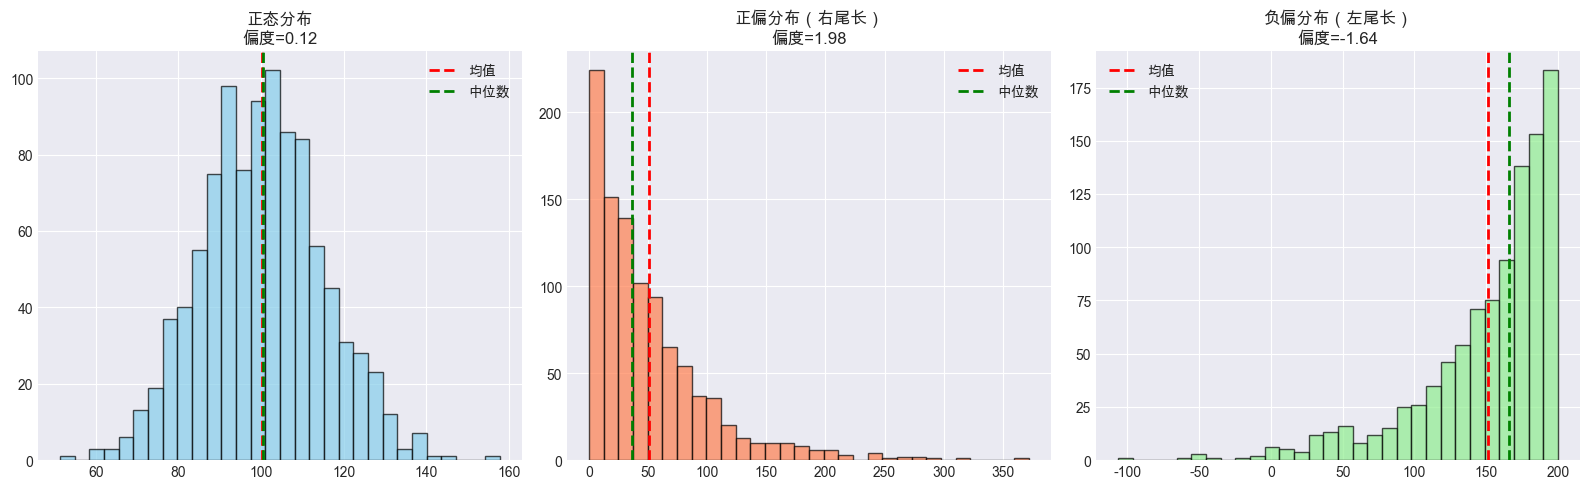

💡 观察: 正偏分布中，均值被极端高值拉高，大于中位数


In [62]:
# 可视化：不同分布形态
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 正态分布
axes[0].hist(normal_dist, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(normal_dist.mean(), color='red', linestyle='--', linewidth=2, label='均值')
axes[0].axvline(np.median(normal_dist), color='green', linestyle='--', linewidth=2, label='中位数')
axes[0].set_title(f'正态分布\n偏度={stats.skew(normal_dist):.2f}', fontsize=12, fontweight='bold')
axes[0].legend()

# 正偏分布
axes[1].hist(right_skew, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(right_skew.mean(), color='red', linestyle='--', linewidth=2, label='均值')
axes[1].axvline(np.median(right_skew), color='green', linestyle='--', linewidth=2, label='中位数')
axes[1].set_title(f'正偏分布（右尾长）\n偏度={stats.skew(right_skew):.2f}', fontsize=12, fontweight='bold')
axes[1].legend()

# 负偏分布
axes[2].hist(left_skew, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[2].axvline(left_skew.mean(), color='red', linestyle='--', linewidth=2, label='均值')
axes[2].axvline(np.median(left_skew), color='green', linestyle='--', linewidth=2, label='中位数')
axes[2].set_title(f'负偏分布（左尾长）\n偏度={stats.skew(left_skew):.2f}', fontsize=12, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

print("💡 观察: 正偏分布中，均值被极端高值拉高，大于中位数")

## 第三部分: 探索性数据分析 (EDA)

### 3.1 数据概览

In [63]:
# 创建综合数据集：电商用户数据
np.random.seed(42)
n = 500  # 用户数量

ecommerce_df = pd.DataFrame({
    'user_id': range(1, n+1),
    'age': np.random.randint(18, 70, n),  # 年龄18-69岁
    'gender': np.random.choice(['男', '女'], n),
    'city_tier': np.random.choice(['一线', '二线', '三线', '四线'], n, p=[0.3, 0.3, 0.25, 0.15]),
    'member_level': np.random.choice(['普通', '银卡', '金卡', 'VIP'], n, p=[0.5, 0.25, 0.15, 0.1]),
    'total_orders': np.random.poisson(15, n),  # 泊松分布是计数数据的常用模型 作用于模拟订单数量
    'total_spent': np.random.gamma(50, 100, n),  # 正偏分布 为了模拟用户总消费金额
    'avg_order_value': np.random.normal(300, 100, n),  # 平均订单价值(正态分布), 300元均值, 100元标准差
    'return_rate': np.random.beta(2, 8, n),  # 0-1之间. beta分布常用于模拟比例数据
    'days_since_last_order': np.random.exponential(30, n)  # 指数分布 模拟上次下单距今天数
})

# 引入一些缺失值
ecommerce_df.loc[np.random.choice(ecommerce_df.index, 20), 'avg_order_value'] = np.nan
ecommerce_df.loc[np.random.choice(ecommerce_df.index, 15), 'return_rate'] = np.nan

print("数据集形状:", ecommerce_df.shape)
print("\n数据预览:")
print(ecommerce_df.head(10))

数据集形状: (500, 10)

数据预览:
   user_id  age gender city_tier member_level  total_orders  total_spent  \
0        1   56      女        四线          VIP            11      4976.73   
1        2   69      男        四线           普通            16      4324.26   
2        3   46      男        一线           普通            12      4685.30   
3        4   32      女        四线           银卡            16      5466.22   
4        5   60      男        二线           普通            17      6493.82   
5        6   25      男        一线          VIP            14      3943.82   
6        7   38      女        二线           金卡            10      4359.80   
7        8   56      男        四线           普通            18      4086.89   
8        9   36      男        二线           普通            12      4834.57   
9       10   40      男        二线           金卡            11      5644.92   

   avg_order_value  return_rate  days_since_last_order  
0           347.35         0.14                  86.04  
1           273.24       

In [64]:
# 数据类型和缺失值检查
print("数据类型:")
print(ecommerce_df.dtypes)

print("\n缺失值统计:")
missing = ecommerce_df.isnull().sum()
missing_pct = (missing / len(ecommerce_df)) * 100
missing_df = pd.DataFrame({'缺失数量': missing, '缺失比例(%)': missing_pct})
print(missing_df[missing_df['缺失数量'] > 0])

print("\n数据基本信息:")
ecommerce_df.info()

数据类型:
user_id                    int64
age                        int64
gender                    object
city_tier                 object
member_level              object
total_orders               int64
total_spent              float64
avg_order_value          float64
return_rate              float64
days_since_last_order    float64
dtype: object

缺失值统计:
                 缺失数量  缺失比例(%)
avg_order_value    19      3.8
return_rate        13      2.6

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   age                    500 non-null    int64  
 2   gender                 500 non-null    object 
 3   city_tier              500 non-null    object 
 4   member_level           500 non-null    object 
 5   total_orders           500 non-null    int64  
 6   total_spent   

In [65]:
# 描述性统计（数值型特征）
print("数值型特征的描述性统计:")
print(ecommerce_df.describe())

print("\n💡 快速洞察:")
print(f"  - 平均年龄: {ecommerce_df['age'].mean():.1f}岁")
print(f"  - 平均订单数: {ecommerce_df['total_orders'].mean():.1f}单")
print(f"  - 平均消费: ¥{ecommerce_df['total_spent'].mean():.2f}")
print(f"  - 平均客单价: ¥{ecommerce_df['avg_order_value'].mean():.2f}")
print(f"  - 平均退货率: {ecommerce_df['return_rate'].mean():.2%}")

数值型特征的描述性统计:
       user_id     age  total_orders  total_spent  avg_order_value  \
count   500.00  500.00        500.00       500.00           481.00   
mean    250.50   44.22         14.83      4999.37           303.96   
std     144.48   15.04          4.03       711.81           105.57   
min       1.00   18.00          4.00      3142.84             7.06   
25%     125.75   32.00         12.00      4535.22           224.32   
50%     250.50   45.00         15.00      4973.00           305.12   
75%     375.25   57.00         17.00      5421.41           377.19   
max     500.00   69.00         29.00      8279.32           586.84   

       return_rate  days_since_last_order  
count     4.87e+02               5.00e+02  
mean      2.00e-01               2.88e+01  
std       1.19e-01               2.73e+01  
min       3.44e-03               7.23e-03  
25%       1.09e-01               8.30e+00  
50%       1.83e-01               2.01e+01  
75%       2.71e-01               4.05e+01  
max 

In [66]:
# 类别型特征统计
print("类别型特征分布:")

cat_cols = ['gender', 'city_tier', 'member_level']
for col in cat_cols:
    print(f"\n{col}:")
    counts = ecommerce_df[col].value_counts()
    pct = ecommerce_df[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'数量': counts, '占比(%)': pct})
    print(result)

类别型特征分布:

gender:
         数量  占比(%)
gender            
男       262   52.4
女       238   47.6

city_tier:
            数量  占比(%)
city_tier            
一线         172   34.4
二线         149   29.8
三线         107   21.4
四线          72   14.4

member_level:
               数量  占比(%)
member_level            
普通            240   48.0
银卡            130   26.0
金卡             81   16.2
VIP            49    9.8


### 3.2 单变量分析

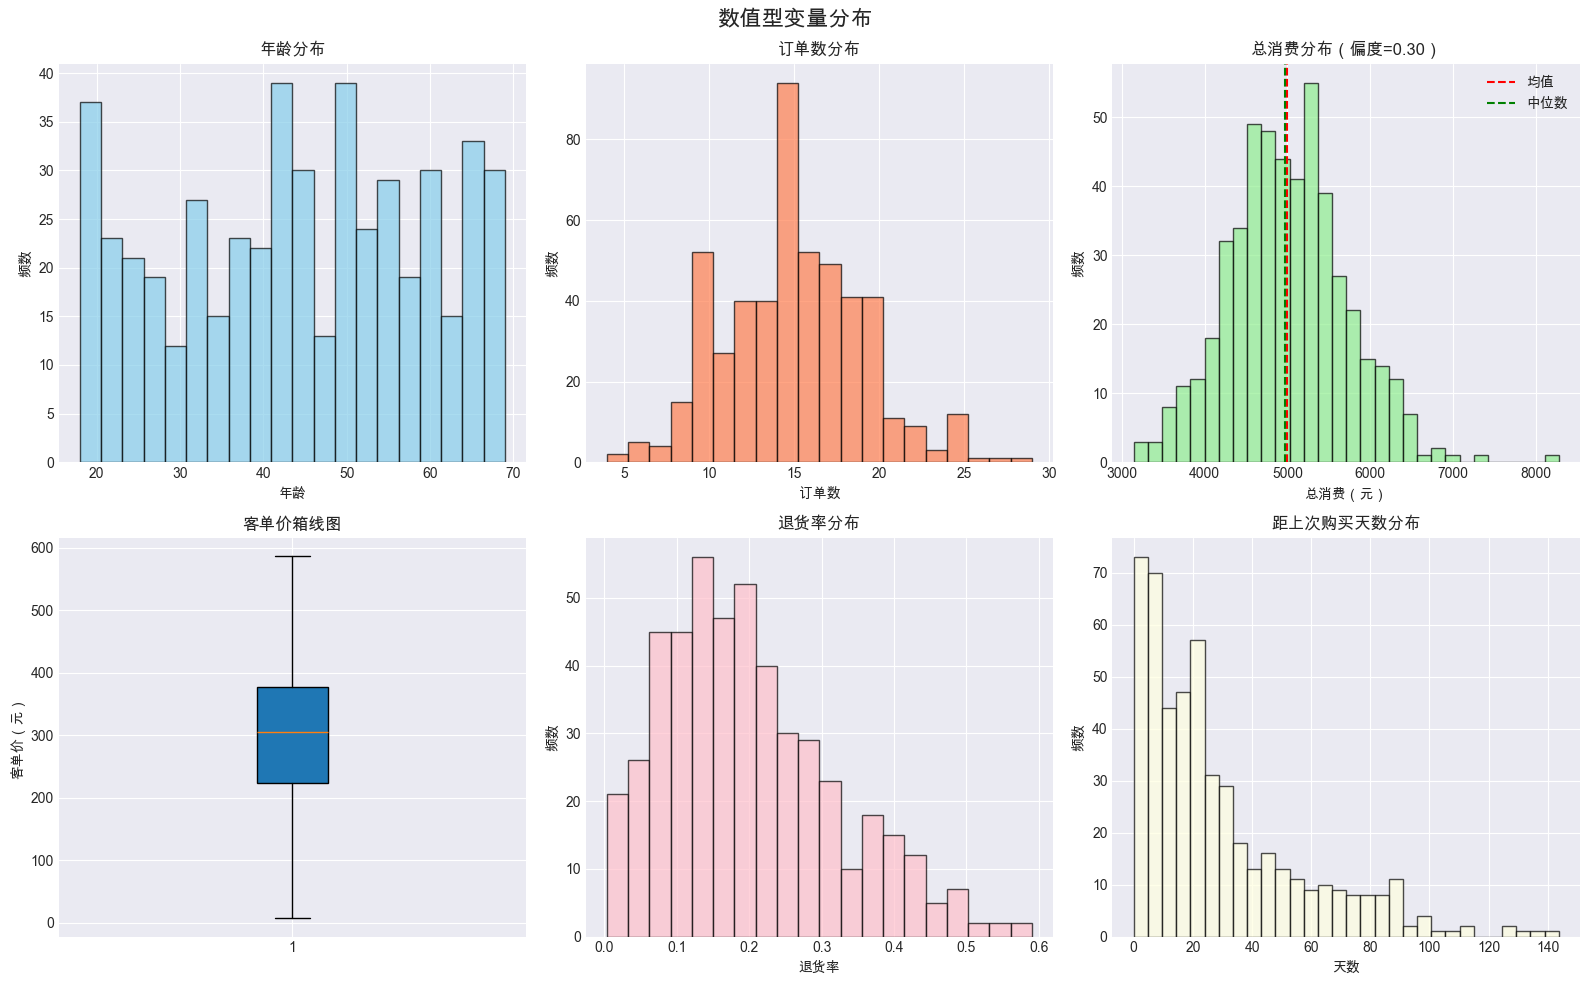

💡 观察:
  - 年龄分布接近均匀分布
  - 订单数呈泊松分布
  - 总消费呈正偏分布（少数高消费用户）
  - 客单价有少量异常值
  - 退货率集中在低值区间（好现象）


In [67]:
# 数值型变量分布可视化
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('数值型变量分布', fontsize=16, fontweight='bold')

# 年龄分布
axes[0, 0].hist(ecommerce_df['age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('年龄分布')
axes[0, 0].set_xlabel('年龄')
axes[0, 0].set_ylabel('频数')

# 订单数分布
axes[0, 1].hist(ecommerce_df['total_orders'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_title('订单数分布')
axes[0, 1].set_xlabel('订单数')
axes[0, 1].set_ylabel('频数')

# 总消费分布（正偏）
axes[0, 2].hist(ecommerce_df['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 2].axvline(ecommerce_df['total_spent'].mean(), color='red', linestyle='--', label='均值')
axes[0, 2].axvline(ecommerce_df['total_spent'].median(), color='green', linestyle='--', label='中位数')
axes[0, 2].set_title(f'总消费分布（偏度={stats.skew(ecommerce_df["total_spent"]):.2f}）')
axes[0, 2].set_xlabel('总消费（元）')
axes[0, 2].set_ylabel('频数')
axes[0, 2].legend()

# 客单价箱线图
axes[1, 0].boxplot(ecommerce_df['avg_order_value'].dropna(), vert=True, patch_artist=True)
axes[1, 0].set_title('客单价箱线图')
axes[1, 0].set_ylabel('客单价（元）')

# 退货率分布
axes[1, 1].hist(ecommerce_df['return_rate'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='pink')
axes[1, 1].set_title('退货率分布')
axes[1, 1].set_xlabel('退货率')
axes[1, 1].set_ylabel('频数')

# 距上次购买天数分布
axes[1, 2].hist(ecommerce_df['days_since_last_order'], bins=30, edgecolor='black', alpha=0.7, color='lightyellow')
axes[1, 2].set_title('距上次购买天数分布')
axes[1, 2].set_xlabel('天数')
axes[1, 2].set_ylabel('频数')

plt.tight_layout()
plt.show()

print("💡 观察:")
print("  - 年龄分布接近均匀分布")
print("  - 订单数呈泊松分布")
print("  - 总消费呈正偏分布（少数高消费用户）")
print("  - 客单价有少量异常值")
print("  - 退货率集中在低值区间（好现象）")

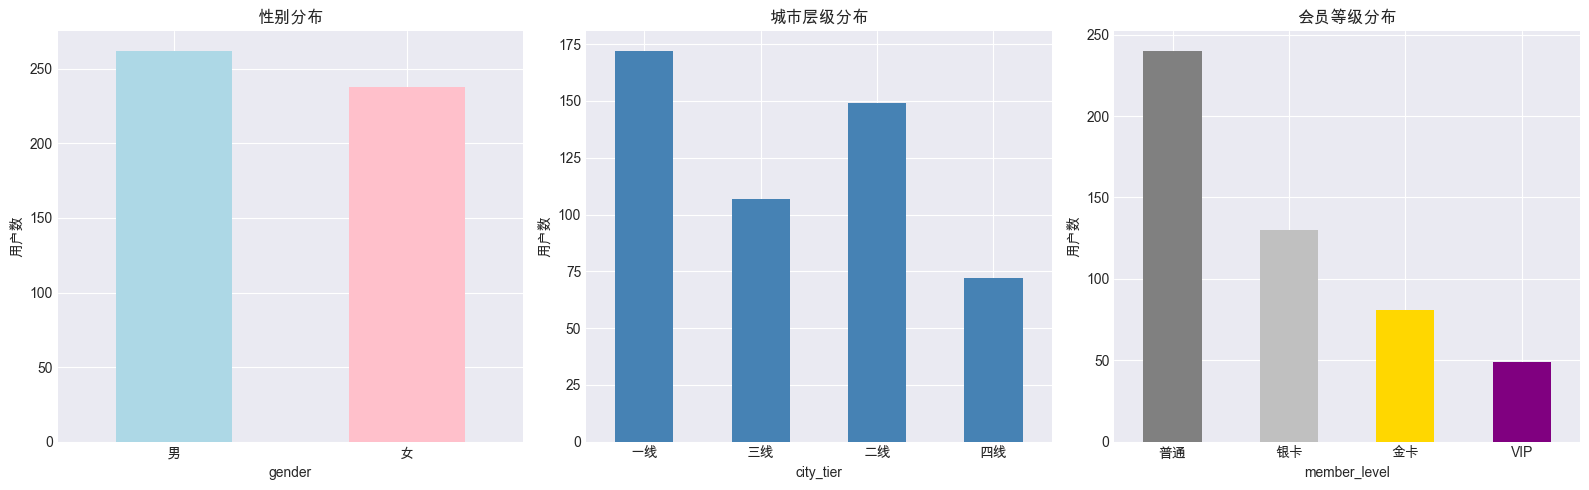

In [68]:
# 类别型变量可视化
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 性别分布
ecommerce_df['gender'].value_counts().plot(kind='bar', ax=axes[0], color=['lightblue', 'pink'])
axes[0].set_title('性别分布', fontsize=12, fontweight='bold')
axes[0].set_ylabel('用户数')
axes[0].tick_params(axis='x', rotation=0)

# 城市层级分布
ecommerce_df['city_tier'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('城市层级分布', fontsize=12, fontweight='bold')
axes[1].set_ylabel('用户数')
axes[1].tick_params(axis='x', rotation=0)

# 会员等级分布
member_order = ['普通', '银卡', '金卡', 'VIP']
member_counts = ecommerce_df['member_level'].value_counts().reindex(member_order)
member_counts.plot(kind='bar', ax=axes[2], color=['gray', 'silver', 'gold', 'purple'])
axes[2].set_title('会员等级分布', fontsize=12, fontweight='bold')
axes[2].set_ylabel('用户数')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 3.3 双变量分析

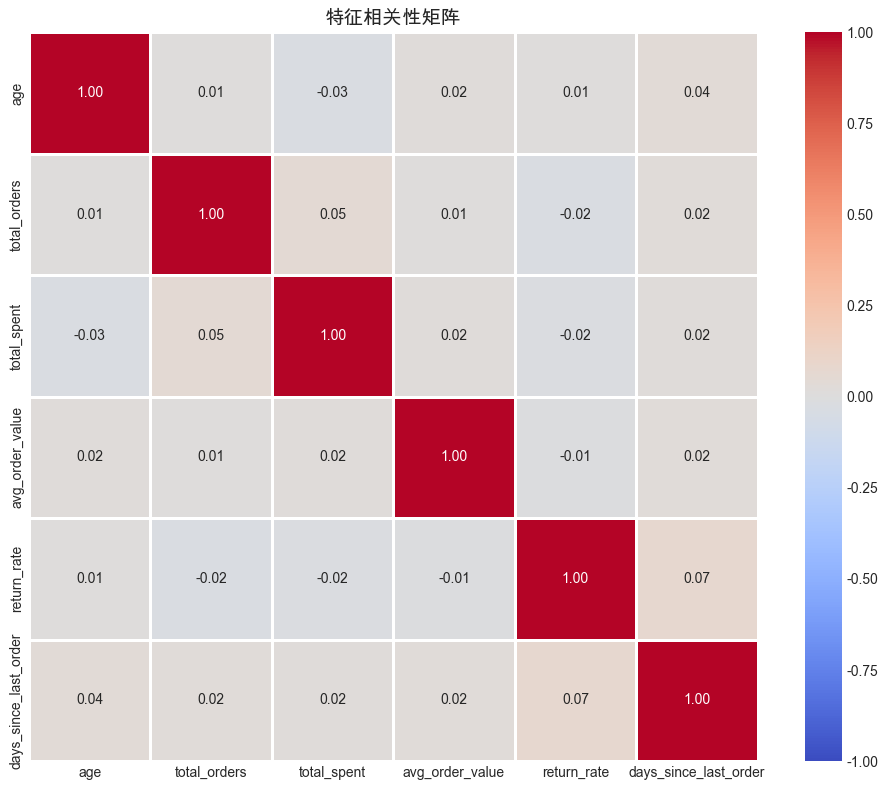

💡 相关性洞察:
  - total_orders与total_spent相关系数: 0.05 （强正相关）
  - return_rate与total_spent相关系数: -0.02
  - days_since_last_order与total_orders相关系数: 0.02


In [69]:
# 数值 vs 数值：相关性分析
numeric_cols = ['age', 'total_orders', 'total_spent', 'avg_order_value', 'return_rate', 'days_since_last_order']
corr_matrix = ecommerce_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('特征相关性矩阵', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 相关性洞察:")
print(f"  - total_orders与total_spent相关系数: {corr_matrix.loc['total_orders', 'total_spent']:.2f} （强正相关）")
print(f"  - return_rate与total_spent相关系数: {corr_matrix.loc['return_rate', 'total_spent']:.2f}")
print(f"  - days_since_last_order与total_orders相关系数: {corr_matrix.loc['days_since_last_order', 'total_orders']:.2f}")

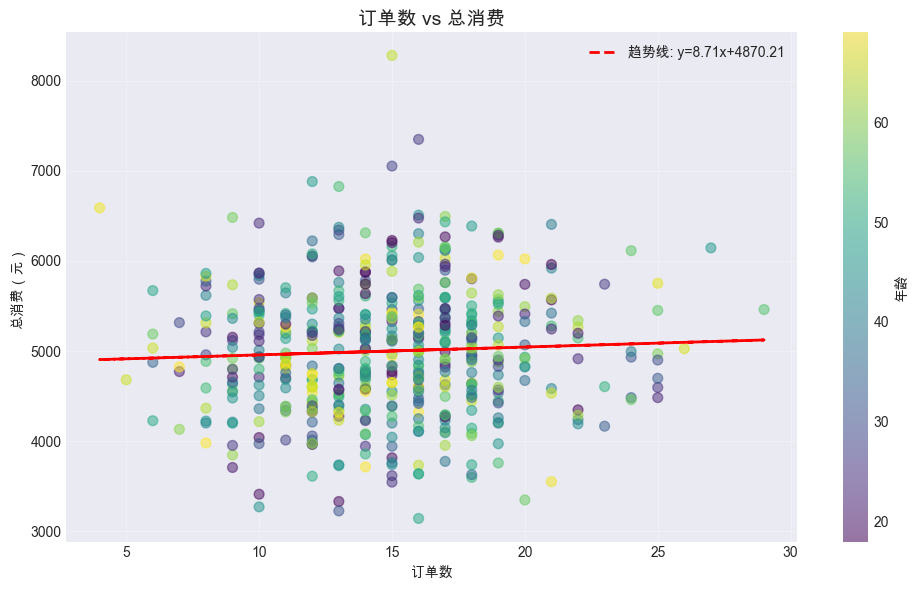

💡 观察: 订单数与总消费呈强线性关系，这符合业务直觉


In [70]:
# 散点图：订单数 vs 总消费
plt.figure(figsize=(10, 6))
plt.scatter(ecommerce_df['total_orders'], ecommerce_df['total_spent'], 
            alpha=0.5, s=50, c=ecommerce_df['age'], cmap='viridis')
plt.colorbar(label='年龄')

# 添加趋势线
z = np.polyfit(ecommerce_df['total_orders'], ecommerce_df['total_spent'], 1)
p = np.poly1d(z)
plt.plot(ecommerce_df['total_orders'], p(ecommerce_df['total_orders']), 
         "r--", linewidth=2, label=f'趋势线: y={z[0]:.2f}x+{z[1]:.2f}')

plt.title('订单数 vs 总消费', fontsize=14, fontweight='bold')
plt.xlabel('订单数')
plt.ylabel('总消费（元）')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 观察: 订单数与总消费呈强线性关系，这符合业务直觉")

/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_87202/2378575188.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ecommerce_df, x='city_tier_cat', y='return_rate', ax=axes[1], palette='Set2')


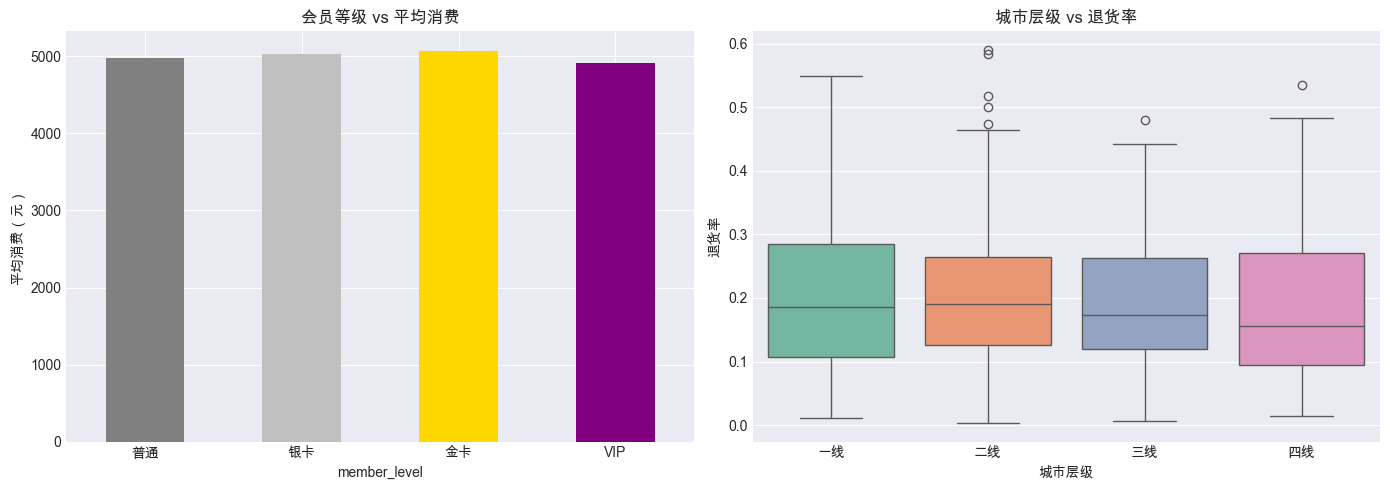

💡 业务洞察:
  - VIP用户的平均消费显著高于普通用户
  - 不同城市层级的退货率差异不大


In [71]:
# 类别 vs 数值：分组对比
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 会员等级 vs 平均消费
member_order = ['普通', '银卡', '金卡', 'VIP']
avg_spent_by_member = ecommerce_df.groupby('member_level')['total_spent'].mean().reindex(member_order)
avg_spent_by_member.plot(kind='bar', ax=axes[0], color=['gray', 'silver', 'gold', 'purple'])
axes[0].set_title('会员等级 vs 平均消费', fontsize=12, fontweight='bold')
axes[0].set_ylabel('平均消费（元）')
axes[0].tick_params(axis='x', rotation=0)

# 城市层级 vs 退货率（箱线图）
city_order = ['一线', '二线', '三线', '四线']
ecommerce_df['city_tier_cat'] = pd.Categorical(ecommerce_df['city_tier'], categories=city_order, ordered=True)
sns.boxplot(data=ecommerce_df, x='city_tier_cat', y='return_rate', ax=axes[1], palette='Set2')
axes[1].set_title('城市层级 vs 退货率', fontsize=12, fontweight='bold')
axes[1].set_xlabel('城市层级')
axes[1].set_ylabel('退货率')

plt.tight_layout()
plt.show()

print("💡 业务洞察:")
print("  - VIP用户的平均消费显著高于普通用户")
print("  - 不同城市层级的退货率差异不大")

## 第四部分: 异常值识别与处理

### 4.1 IQR方法识别异常值

In [72]:
def detect_outliers_iqr(data, column):
    """
    使用IQR方法检测异常值
    """
    Q1 = data[column].quantile(0.25)  # quantile 是分位数函数，返回指定分位点的值
    Q3 = data[column].quantile(0.75)
    # Q3 - Q1 是为了计算四分位距（IQR），表示中间50%数据的范围
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR  # 计算下界
    upper_bound = Q3 + 1.5 * IQR  # 计算上界
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]  # 筛选异常值
    
    return outliers, lower_bound, upper_bound  # 返回异常值及其范围

# 检测总消费的异常值
outliers, lower, upper = detect_outliers_iqr(ecommerce_df, 'total_spent')

print(f"IQR方法检测结果（total_spent）:")
print(f"  Q1 = {ecommerce_df['total_spent'].quantile(0.25):.2f}")
print(f"  Q3 = {ecommerce_df['total_spent'].quantile(0.75):.2f}")
print(f"  IQR = {ecommerce_df['total_spent'].quantile(0.75) - ecommerce_df['total_spent'].quantile(0.25):.2f}")
print(f"  异常值范围: < {lower:.2f} 或 > {upper:.2f}")
print(f"  检测到异常值数量: {len(outliers)} ({len(outliers)/len(ecommerce_df)*100:.2f}%)")

if len(outliers) > 0:
    print("\n异常值样例（前5个）:")
    print(outliers[['user_id', 'total_orders', 'total_spent', 'avg_order_value']].head())

IQR方法检测结果（total_spent）:
  Q1 = 4535.22
  Q3 = 5421.41
  IQR = 886.19
  异常值范围: < 3205.93 或 > 6750.70
  检测到异常值数量: 6 (1.20%)

异常值样例（前5个）:
     user_id  total_orders  total_spent  avg_order_value
131      132            13      6825.80           364.65
150      151            16      7348.41           237.23
170      171            12      6880.69           476.12
188      189            15      7052.07           299.76
365      366            15      8279.32           305.12


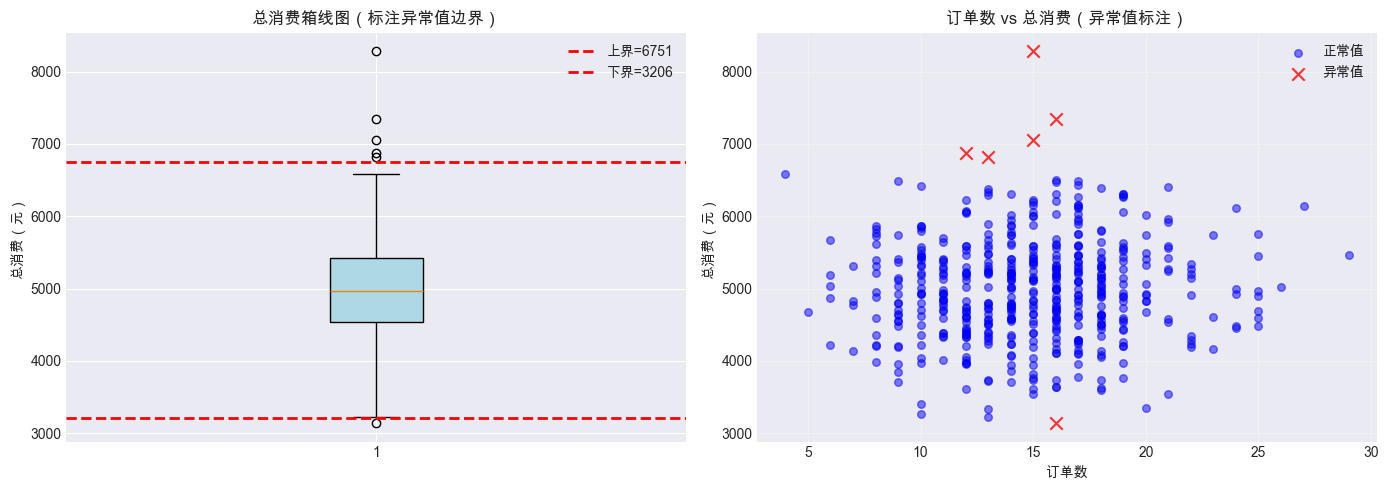

In [73]:
# 可视化异常值
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 箱线图标注异常值
bp = axes[0].boxplot(ecommerce_df['total_spent'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0].axhline(upper, color='red', linestyle='--', linewidth=2, label=f'上界={upper:.0f}')
axes[0].axhline(lower, color='red', linestyle='--', linewidth=2, label=f'下界={lower:.0f}')
axes[0].set_title('总消费箱线图（标注异常值边界）', fontsize=12, fontweight='bold')
axes[0].set_ylabel('总消费（元）')
axes[0].legend()

# 散点图标注异常值
normal_mask = (ecommerce_df['total_spent'] >= lower) & (ecommerce_df['total_spent'] <= upper)
axes[1].scatter(ecommerce_df.loc[normal_mask, 'total_orders'], 
                ecommerce_df.loc[normal_mask, 'total_spent'],
                alpha=0.5, s=30, label='正常值', color='blue')
axes[1].scatter(ecommerce_df.loc[~normal_mask, 'total_orders'], 
                ecommerce_df.loc[~normal_mask, 'total_spent'],
                alpha=0.8, s=80, label='异常值', color='red', marker='x')
axes[1].set_title('订单数 vs 总消费（异常值标注）', fontsize=12, fontweight='bold')
axes[1].set_xlabel('订单数')
axes[1].set_ylabel('总消费（元）')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Z-score方法识别异常值

In [74]:
def detect_outliers_zscore(data, column, threshold=3):
    """
    使用Z-score方法检测异常值
    """
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    outliers = data.iloc[outlier_indices]
    
    return outliers, z_scores

# 检测总消费的异常值
outliers_z, z_scores = detect_outliers_zscore(ecommerce_df, 'total_spent', threshold=3)

print(f"Z-score方法检测结果（total_spent，阈值=3）:")
print(f"  均值 = {ecommerce_df['total_spent'].mean():.2f}")
print(f"  标准差 = {ecommerce_df['total_spent'].std():.2f}")
print(f"  检测到异常值数量: {len(outliers_z)} ({len(outliers_z)/len(ecommerce_df)*100:.2f}%)")

if len(outliers_z) > 0:
    print("\n异常值样例（前5个）:")
    print(outliers_z[['user_id', 'total_spent']].head())

Z-score方法检测结果（total_spent，阈值=3）:
  均值 = 4999.37
  标准差 = 711.81
  检测到异常值数量: 2 (0.40%)

异常值样例（前5个）:
     user_id  total_spent
150      151      7348.41
365      366      8279.32


In [75]:
# 对比两种方法
outliers_iqr, _, _ = detect_outliers_iqr(ecommerce_df, 'total_spent')
outliers_z, _ = detect_outliers_zscore(ecommerce_df, 'total_spent', threshold=3)

print("异常值检测方法对比:")
print(f"  IQR方法: {len(outliers_iqr)} 个异常值 ({len(outliers_iqr)/len(ecommerce_df)*100:.2f}%)")
print(f"  Z-score方法: {len(outliers_z)} 个异常值 ({len(outliers_z)/len(ecommerce_df)*100:.2f}%)")

print("\n💡 方法选择建议:")
print("  - IQR方法: 对分布无假设，适用于偏态分布，更保守")
print("  - Z-score方法: 假设正态分布，适用于对称分布，更严格")
print("  - 实际应用: 结合业务知识，不要盲目删除异常值")

异常值检测方法对比:
  IQR方法: 6 个异常值 (1.20%)
  Z-score方法: 2 个异常值 (0.40%)

💡 方法选择建议:
  - IQR方法: 对分布无假设，适用于偏态分布，更保守
  - Z-score方法: 假设正态分布，适用于对称分布，更严格
  - 实际应用: 结合业务知识，不要盲目删除异常值


### 4.3 异常值处理策略

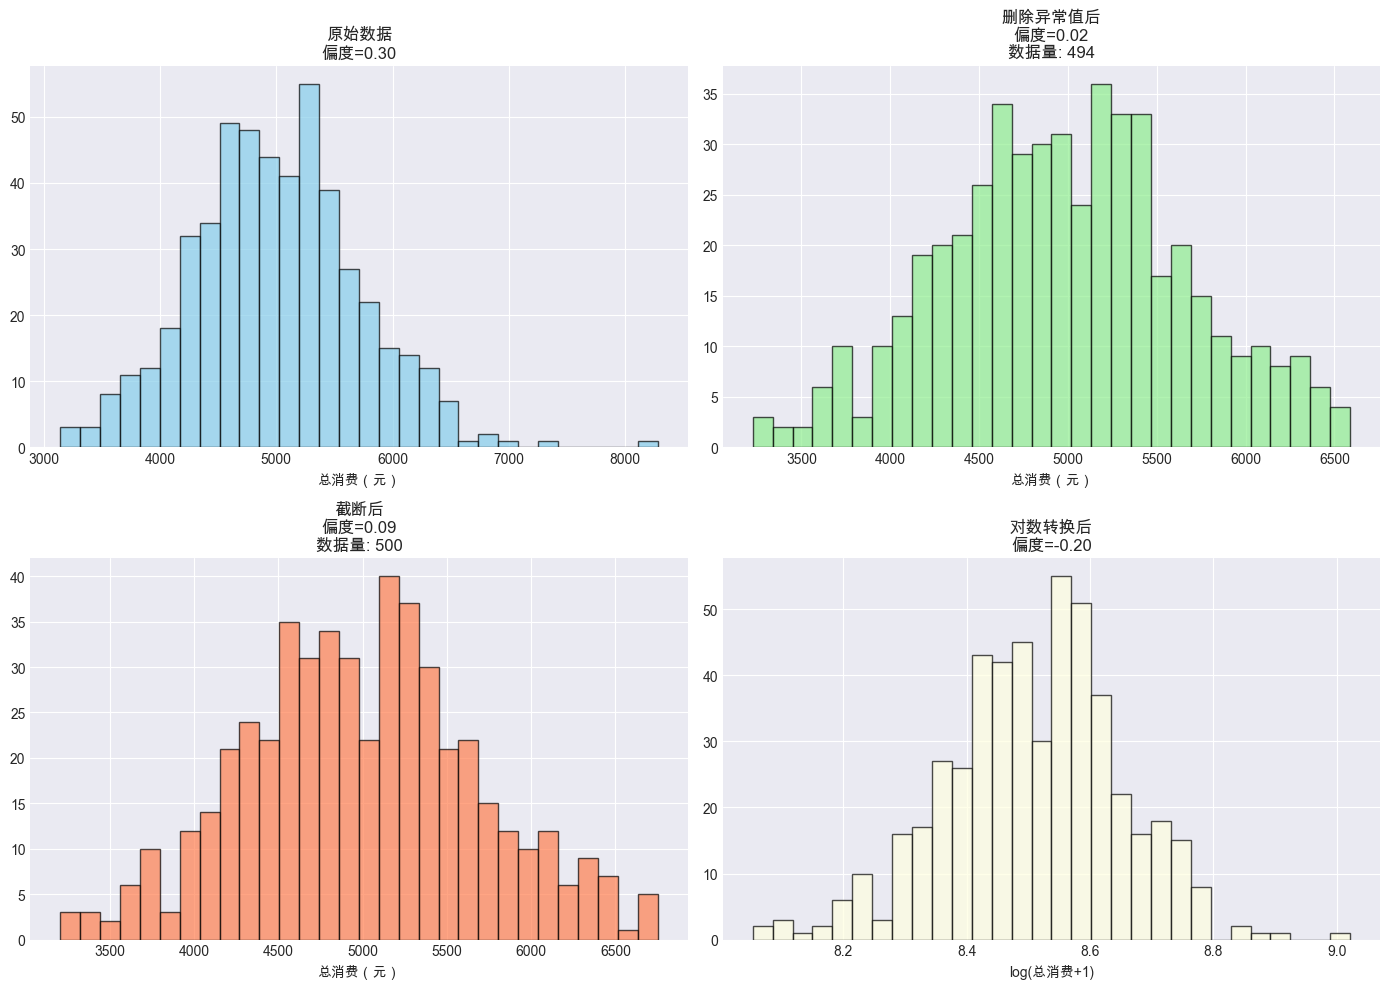


异常值处理效果对比:
原始数据: 均值=4999.37, 中位数=4973.00, 偏度=0.30
删除异常值: 均值=4980.07, 中位数=4965.88, 偏度=0.02
截断处理: 均值=4994.23, 中位数=4973.00, 偏度=0.09
对数转换: 均值=8.51, 中位数=8.51, 偏度=-0.20


In [76]:
# 创建包含异常值的数据副本
df_original = ecommerce_df.copy()

# 策略1: 删除异常值
outliers, lower, upper = detect_outliers_iqr(df_original, 'total_spent')
df_removed = df_original[(df_original['total_spent'] >= lower) & (df_original['total_spent'] <= upper)]

# 策略2: 截断（Cap）
df_capped = df_original.copy()
df_capped['total_spent'] = df_capped['total_spent'].clip(lower=lower, upper=upper)

# 策略3: 对数转换（适用于正偏分布）
df_log = df_original.copy()
df_log['total_spent_log'] = np.log1p(df_log['total_spent'])  # log1p(x) = log(1+x)

# 对比效果
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 原始数据
axes[0, 0].hist(df_original['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title(f'原始数据\n偏度={stats.skew(df_original["total_spent"]):.2f}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('总消费（元）')

# 删除异常值后
axes[0, 1].hist(df_removed['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 1].set_title(f'删除异常值后\n偏度={stats.skew(df_removed["total_spent"]):.2f}\n数据量: {len(df_removed)}', 
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('总消费（元）')

# 截断后
axes[1, 0].hist(df_capped['total_spent'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].set_title(f'截断后\n偏度={stats.skew(df_capped["total_spent"]):.2f}\n数据量: {len(df_capped)}', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('总消费（元）')

# 对数转换后
axes[1, 1].hist(df_log['total_spent_log'], bins=30, edgecolor='black', alpha=0.7, color='lightyellow')
axes[1, 1].set_title(f'对数转换后\n偏度={stats.skew(df_log["total_spent_log"]):.2f}', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('log(总消费+1)')

plt.tight_layout()
plt.show()

print("\n异常值处理效果对比:")
print(f"原始数据: 均值={df_original['total_spent'].mean():.2f}, 中位数={df_original['total_spent'].median():.2f}, 偏度={stats.skew(df_original['total_spent']):.2f}")
print(f"删除异常值: 均值={df_removed['total_spent'].mean():.2f}, 中位数={df_removed['total_spent'].median():.2f}, 偏度={stats.skew(df_removed['total_spent']):.2f}")
print(f"截断处理: 均值={df_capped['total_spent'].mean():.2f}, 中位数={df_capped['total_spent'].median():.2f}, 偏度={stats.skew(df_capped['total_spent']):.2f}")
print(f"对数转换: 均值={df_log['total_spent_log'].mean():.2f}, 中位数={df_log['total_spent_log'].median():.2f}, 偏度={stats.skew(df_log['total_spent_log']):.2f}")

## 🎯 综合练习: 完整的EDA流程

**任务**: 对给定的客户数据进行完整的EDA分析

**要求**:
1. 数据概览：形状、类型、缺失值、基本统计
2. 单变量分析：每个特征的分布（直方图/箱线图）
3. 双变量分析：相关性矩阵、关键关系的散点图
4. 异常值检测：使用IQR或Z-score方法
5. 总结洞察：3-5条关键发现

In [86]:
# 生成练习数据：客户流失数据
np.random.seed(123)
n_customers = 800

churn_df = pd.DataFrame({
    '客户使用时长': np.random.randint(1, 72, n_customers),  # 客户使用时长（1-72个月）
    '月费用': np.random.normal(65, 20, n_customers),  # 月费用（均值65，标准差20）
    '总费用': np.random.gamma(50, 50, n_customers),  # 总费用（正偏分布）
    '使用的服务数量': np.random.randint(1, 8, n_customers),  # 使用的服务数量（1-7个）
    '支持工单数量': np.random.poisson(2, n_customers),  # 支持工单数量（泊松分布）
    '合同类型': np.random.choice(['月付', '年付', '两年付'], n_customers, p=[0.5, 0.3, 0.2]),  # 合同类型
    '支付方式': np.random.choice(['信用卡', '借记卡', '银行转账', '电子钱包'], n_customers),  # 支付方式
    '流失标签': np.random.choice([0, 1], n_customers, p=[0.73, 0.27])  # 流失标签
})

# 引入一些数据质量问题
churn_df.loc[np.random.choice(churn_df.index, 30), '月费用'] = np.nan  # 缺失值
churn_df.loc[np.random.choice(churn_df.index, 5), '总费用'] = churn_df['总费用'].max() * 3  # 异常值

print("客户流失数据集准备完成！")
print(f"数据形状: {churn_df.shape}")
print(f"流失率: {churn_df['流失标签'].mean():.2%}")
print("\n开始你的EDA分析吧！")

# TODO: 在下面的cell中完成EDA分析

客户流失数据集准备完成！
数据形状: (800, 8)
流失率: 27.88%

开始你的EDA分析吧！


数据集形状 (800, 8)
数据概览: 
    客户使用时长    月费用      总费用  使用的服务数量  支持工单数量 合同类型  支付方式  流失标签
0      67  68.79  2557.76        2       2   月付  电子钱包     0
1      18  67.25  2709.94        5       1  两年付   借记卡     1
2      58  80.07  2006.19        2       0   年付  电子钱包     0
3      48  57.84  2258.69        3       1   月付  银行转账     0
4      33  69.50  2231.31        7       3   月付  银行转账     0
数据类型:
 客户使用时长       int64
月费用        float64
总费用        float64
使用的服务数量      int64
支持工单数量       int64
合同类型        object
支付方式        object
流失标签         int64
dtype: object
数据缺失值统计:
     缺失数量  缺失比例(%)
月费用    29     3.62
数值型特征的描述性统计:
       客户使用时长     月费用       总费用  使用的服务数量  支持工单数量    流失标签
count  800.00  771.00    800.00   800.00  800.00  800.00
mean    35.77   65.60   2560.29     4.02    2.01    0.28
std     20.45   20.11    778.70     2.02    1.49    0.45
min      1.00   -0.14   1531.46     1.00    0.00    0.00
25%     19.00   52.08   2262.64     2.00    1.00    0.00
50%     35.00   65.57   2496.08     4.00  

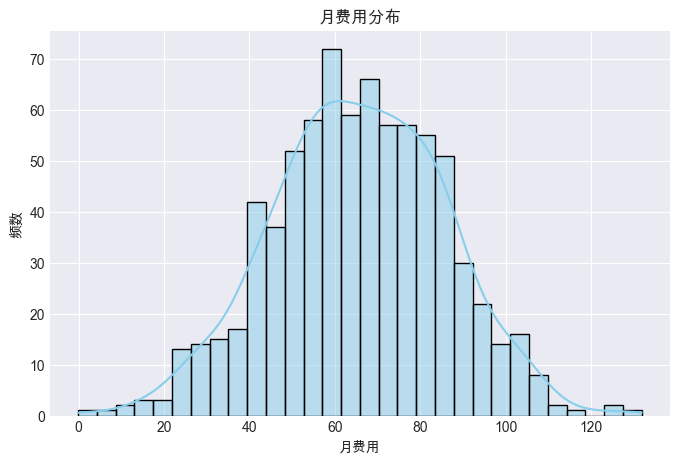

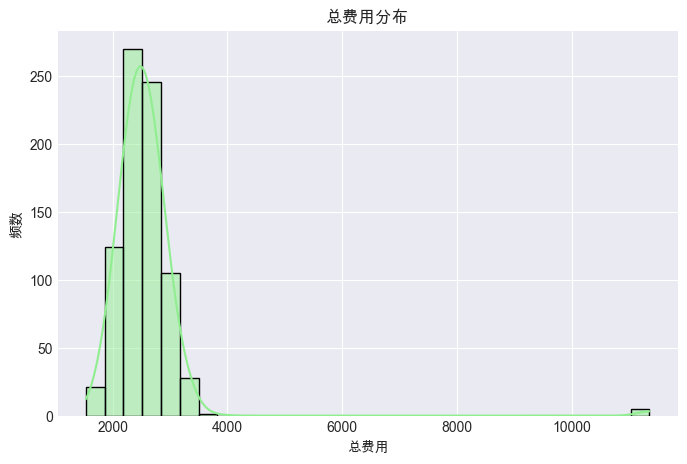

/var/folders/fm/h98qrnw52q11k3zqc24yzdgh0000gn/T/ipykernel_87202/1981406484.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='合同类型', data=churn_df, palette='pastel')


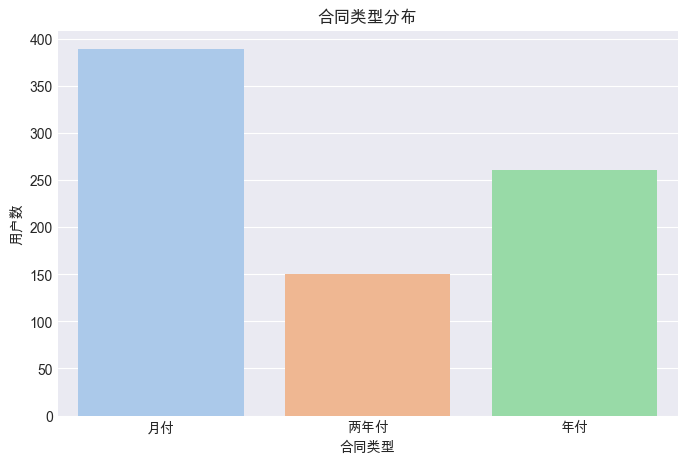

双变量分析:


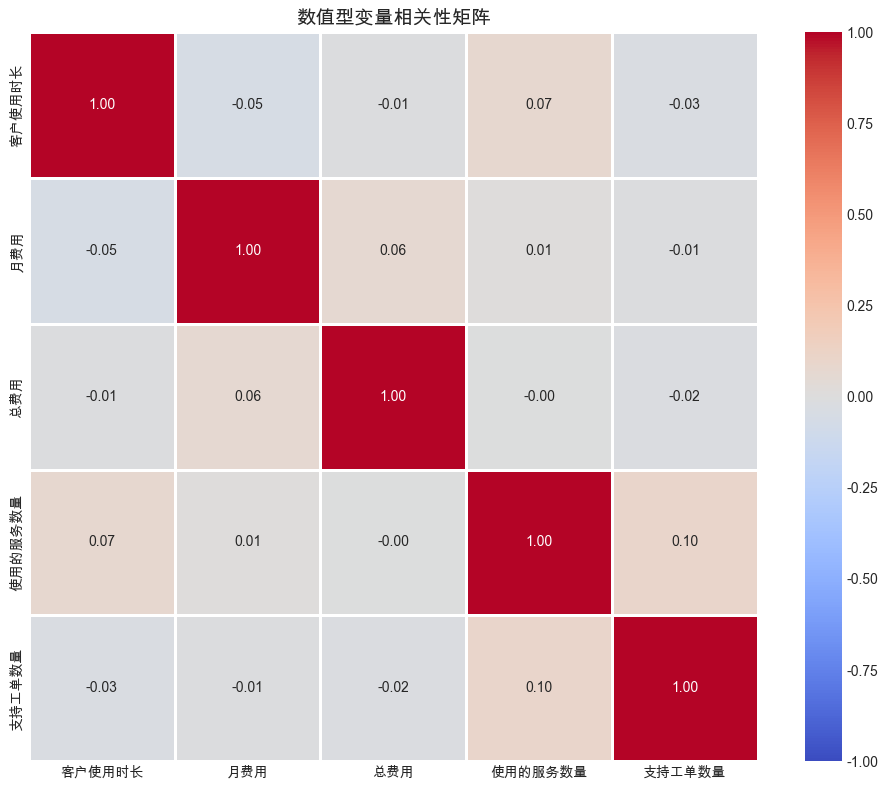

异常值检测:
IQR方法检测结果（总费用）:
  异常值范围: < 1528.50 或 > 3486.21
  检测到异常值数量: 6 (0.75%)
总结关键发现:
  - 数据集包含800个客户，流失率约为27%
  - 月费用和总费用呈现正偏分布，部分客户月费用缺失
  - 合同类型中，月付用户占比最高
  - 总费用存在少量异常值，需进一步处理


In [95]:
# 你的EDA代码：
# 1. 数据概览
print("数据集形状", churn_df.shape)
# 数据概览
print("数据概览: \n", churn_df.head())

# 2. 缺失值检查
print("数据类型:\n", churn_df.dtypes)
print("数据缺失值统计:")
missing = churn_df.isnull().sum()
missing_pct = (missing / len(churn_df)) * 100  # 计算缺失比例
missing_df = pd.DataFrame({'缺失数量': missing, '缺失比例(%)': missing_pct})
print(missing_df[missing_df['缺失数量'] > 0])


# 3. 描述性统计
print("数值型特征的描述性统计:")
print(churn_df.describe())


# 4. 单变量分析（选择3-4个关键变量可视化）
print("单变量分析:")
# 月费用分布
plt.figure(figsize=(8, 5))
sns.histplot(churn_df['月费用'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('月费用分布')
plt.xlabel('月费用')
plt.ylabel('频数')
plt.show()

# 总费用分布
plt.figure(figsize=(8, 5))
sns.histplot(churn_df['总费用'].dropna(), bins=30, kde=True, color='lightgreen')
plt.title('总费用分布')
plt.xlabel('总费用')
plt.ylabel('频数')
plt.show()

# 合同类型分布
plt.figure(figsize=(8, 5))
sns.countplot(x='合同类型', data=churn_df, palette='pastel')
plt.title('合同类型分布')
plt.xlabel('合同类型')
plt.ylabel('用户数')
plt.show()


# 5. 双变量分析（相关性、分组对比）
print("双变量分析:")
# 数值型变量相关性矩阵
numeric_cols = ['客户使用时长', '月费用', '总费用', '使用的服务数量', '支持工单数量']
corr_matrix = churn_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('数值型变量相关性矩阵', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 6. 异常值检测
print("异常值检测:")
outliers, lower, upper = detect_outliers_iqr(churn_df, '总费用')
print(f"IQR方法检测结果（总费用）:")
print(f"  异常值范围: < {lower:.2f} 或 > {upper:.2f}")
print(f"  检测到异常值数量: {len(outliers)} ({len(outliers)/len(churn_df)*100:.2f}%)")


# 7. 总结关键发现
print("总结关键发现:")
print("  - 数据集包含800个客户，流失率约为27%")
print("  - 月费用和总费用呈现正偏分布，部分客户月费用缺失")
print("  - 合同类型中，月付用户占比最高")
print("  - 总费用存在少量异常值，需进一步处理")


## 🎯 总结与要点

### 核心知识点回顾

1. **描述性统计**:
   - 集中趋势: mean(), median(), mode()
   - 离散程度: std(), var(), quantile(), IQR
   - 分布形态: skew(), kurt()

2. **EDA流程**:
   - Step 1: 数据概览（info(), describe()）
   - Step 2: 单变量分析（直方图、箱线图）
   - Step 3: 双变量分析（散点图、相关性）
   - Step 4: 多变量分析（分组对比、热力图）

3. **异常值识别**:
   - IQR方法: [Q1-1.5*IQR, Q3+1.5*IQR]
   - Z-score方法: |z| > 3
   - 可视化: 箱线图、散点图

4. **异常值处理**:
   - 删除: 适用于数据量大、异常值少
   - 截断: 保留数据量，限制极端值
   - 转换: 对数转换缓解正偏
   - 标记: 创建异常值指示特征

5. **最佳实践**:
   - EDA是迭代过程，不要一次做完
   - 始终结合业务知识解释数据
   - 可视化是理解数据的最快方式
   - 记录关键发现，形成分析报告

### 下一步学习

- ✅ 完成综合练习
- 📚 继续学习 [05-data-preprocessing.ipynb](./05-data-preprocessing.ipynb)
- 🚀 应用到实际项目中

**恭喜完成描述性分析与EDA教程！** 🎉

"数据分析的80%时间都在理解数据" - 扎实的EDA能力是数据科学家的基本功！